# NLP를 활용한 레시피 추천 챗봇 구현
**개요**
- Collection 
- Preprocessing
- EDA
- Embeddings
- Modeling
- Streamlit

## 3.EDA

### 라이브러리 import

In [1]:
# 데이터 분석
import numpy as np
import pandas as pd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import plotly.graph_objs as go
from plotly.subplots import make_subplots

### 시각화 테마 설정

In [2]:
# 스타일, 폰트 등 지정
sns.set_style('dark')
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

In [3]:
# retina 설정
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# 색상 코드 지정
green_code = ['#228B22', '#64ae64']
blue_code = ['#688BB3', '#8AB9CE']

In [5]:
# 팔레트 지정
sns.set_palette('pastel')

### 데이터 불러오기

In [6]:
# 데이터 불러오기
df = pd.read_csv('data/preprocessed_recipes.csv')
df.shape

(4947, 11)

In [7]:
# 데이터 구성 요약
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요리      4947 non-null   object
 1   종류      4947 non-null   object
 2   난이도     4947 non-null   int64 
 3   소요시간    4947 non-null   int64 
 4   링크      4947 non-null   object
 5   사진      4947 non-null   object
 6   재료      4947 non-null   object
 7   요리방법    4947 non-null   object
 8   설명      4947 non-null   object
 9   재료수     4947 non-null   int64 
 10  질병      4947 non-null   object
dtypes: int64(3), object(8)
memory usage: 425.3+ KB


In [8]:
# 데이터 미리보기
display(df.head(2), df.tail(2))

,요리,종류,난이도,소요시간,링크,사진,재료,요리방법,설명,재료수,질병
0,올리브 소시지 솥밥,메인요리,1,30,https://wtable.co.kr/recipes/rF7F5gmLrySsw7ZXZ...,https://static.wtable.co.kr/image/production/s...,쌀 물 올리브오일 후춧가루 올리브 파마산치즈 샬롯 소시지 파슬리 치킨스톡파우더,"['쌀은 씻어 채에 받쳐 30분 정도 불려주세요.\xa0', '소세지는 모양대로 슬...",올리브를 넣어 이국적인 감칠맛이 매력적인 솥 밥. 별다른 양념없이도 술술 넘어가는 ...,10,일반
1,원 팟 파스타,메인요리,1,20,https://wtable.co.kr/recipes/EzDURnKruCpR2nGxZ...,https://static.wtable.co.kr/image/production/s...,파스타면 물 올리브오일 후춧가루 방울토마토 올리브 소금 파슬리 케이퍼,"['방울토마토는 반으로 썰어주세요.\xa0파슬리는 다져주세요.', '냄비에 파스타면...","냄비에 파스타와 토마토, 올리브 등 재료를 넣고 물을 부은 후 끓이면 완성되는 초간...",9,일반


,요리,종류,난이도,소요시간,링크,사진,재료,요리방법,설명,재료수,질병
4945,단호박 에그슬럿,오븐 요리,2,30,https://wtable.co.kr/recipes/JERayqDgKrLf4fawy...,https://static.wtable.co.kr/image/production/s...,슬라이스햄 단호박 피자치즈 다진파슬리 달걀,['법랑 접시에 석쇠를 놓고 깨끗이 씻은 단호박을 올려 1단에 넣고 광파오븐 수동 ...,노란빛의 달콤한 속살을 가진 단호박은 식이섬유가 많고 열량이 낮아 다이어트에 효과적...,5,비만
4946,대파그라탕,오븐 요리,1,30,https://wtable.co.kr/recipes/JyHPoLXkZ5m8Xu9rt...,https://static.wtable.co.kr/image/production/s...,디종머스타드 대파 후춧가루 타임 코코넛밀크 소금 파슬리 두유 뉴트리셔널이스트,"['냄비에 비건 크림 재료를 붓고 약불에서 10분간 저어가며 끓여주세요.', '깨끗...","대파의 무한변신, 대파그라탕! 대파의 은은한 단맛과 향이 매력적인 요리인데요. 특히...",9,일반


In [9]:
# 기술통계 확인
display(df.describe(), df.describe(include='O'))

,난이도,소요시간,재료수
count,4947.000000,4947.000000,4947.000000
mean,1.391955,35.159491,11.585203
std,0.541261,54.096765,4.598538
min,1.000000,0.000000,1.000000
25%,1.000000,20.000000,8.000000
50%,1.000000,30.000000,11.000000
75%,2.000000,40.000000,14.000000
max,3.000000,2200.000000,30.000000


,요리,종류,링크,사진,재료,요리방법,설명,질병
count,4947,4947,4947,4947,4947,4947,4947,4947
unique,2390,18,2469,2469,2455,2469,2469,3
top,팝콘치킨,메인요리,https://wtable.co.kr/recipes/hhR3EHeGerM8HDNM4...,https://static.wtable.co.kr/image/production/s...,물 어린잎채소 토마토 두부 양배추 설탕 빵가루 후추 식빵 소금 밀가루 홀그레인머스터...,"['양배추는 곱게 채를 썰어주세요.', '식초 1.5티스푼, 설탕 2티스푼, 소금 ...",건강하게 즐기는 영양 만점 홈메이드 샌드위치를 준비했어요. 고기 대신 담백한 두부를...,일반
freq,8,1186,6,6,6,6,6,4668


In [10]:
# 결측치 확인
df.isnull().sum()

요리      0
종류      0
난이도     0
소요시간    0
링크      0
사진      0
재료      0
요리방법    0
설명      0
재료수     0
질병      0
dtype: int64

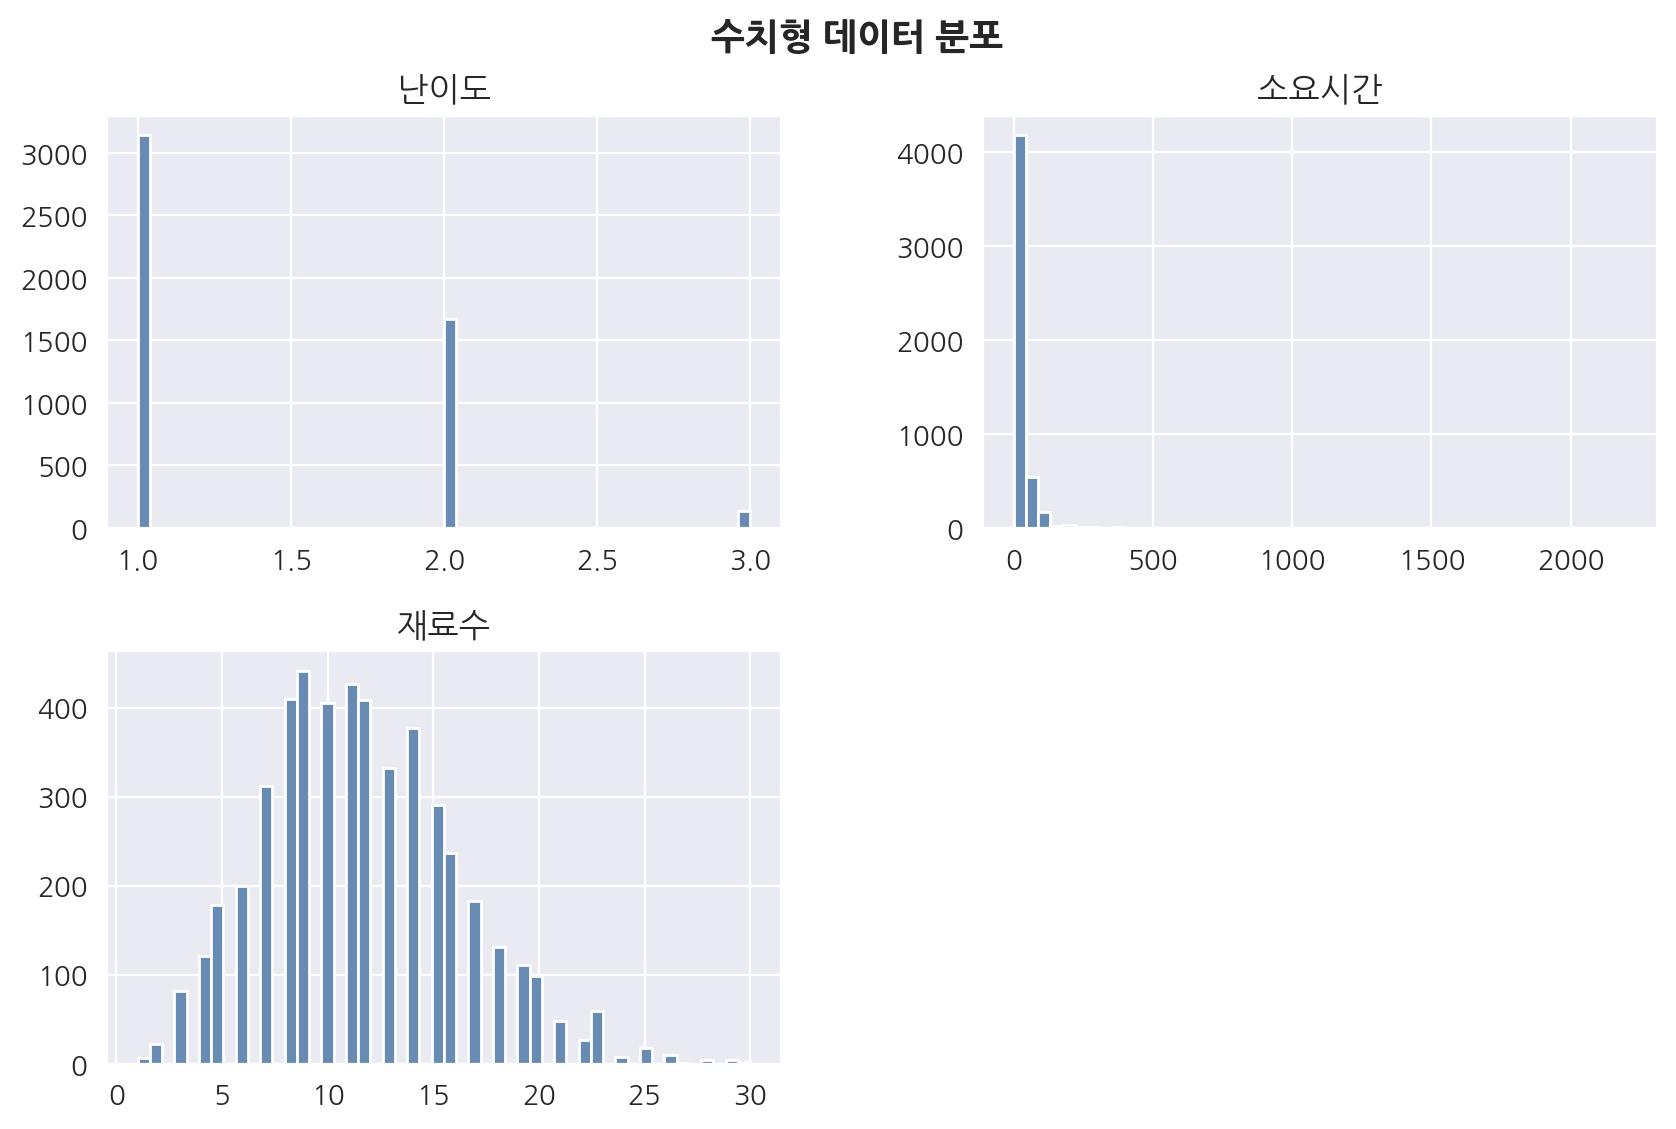

In [11]:
# 수치형 데이터 히스토그램
df.hist(bins=50, figsize=(10, 6), color=blue_code[0]);
plt.suptitle('수치형 데이터 분포', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

In [12]:
# 레시피 이름의 빈도수 확인
# 중복되는 레시피가 여럿 있음을 알 수 있음
# 추후 구현 시에 스트림릿의 위젯으로 필터링해줄 예정이므로 따로 제거하지는 않음
df['요리'].value_counts()

요리
팝콘치킨                8
멘보샤                 7
낫또 아보카도 덮밥          6
과카몰리                6
스키야키                6
                   ..
브로콜리 바게트 샌드위치       1
[우정욱] 아롱사태 해파리냉채    1
고등어조림               1
애플버터                1
고등어 강정              1
Name: count, Length: 2390, dtype: int64

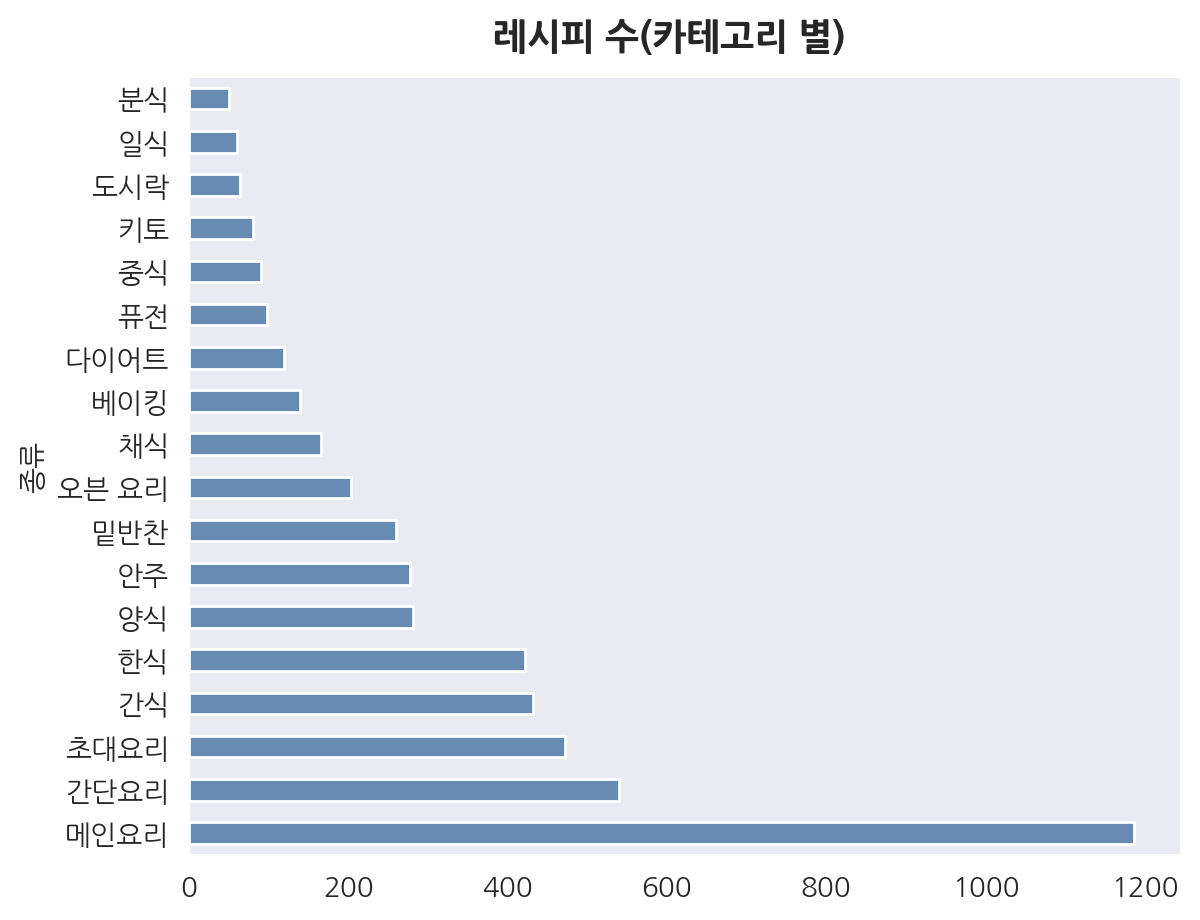

In [13]:
# 카테고리별 레시피 수 확인
df['종류'].value_counts().plot.barh(color=blue_code[0]);
plt.suptitle('레시피 수(카테고리 별)', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.92)
plt.show()

In [14]:
df['종류'].value_counts()

종류
메인요리     1186
간단요리      540
초대요리      472
간식        432
한식        422
양식        282
안주        278
밑반찬       260
오븐 요리     204
채식        166
베이킹       140
다이어트      120
퓨전         98
중식         91
키토         81
도시락        64
일식         61
분식         50
Name: count, dtype: int64

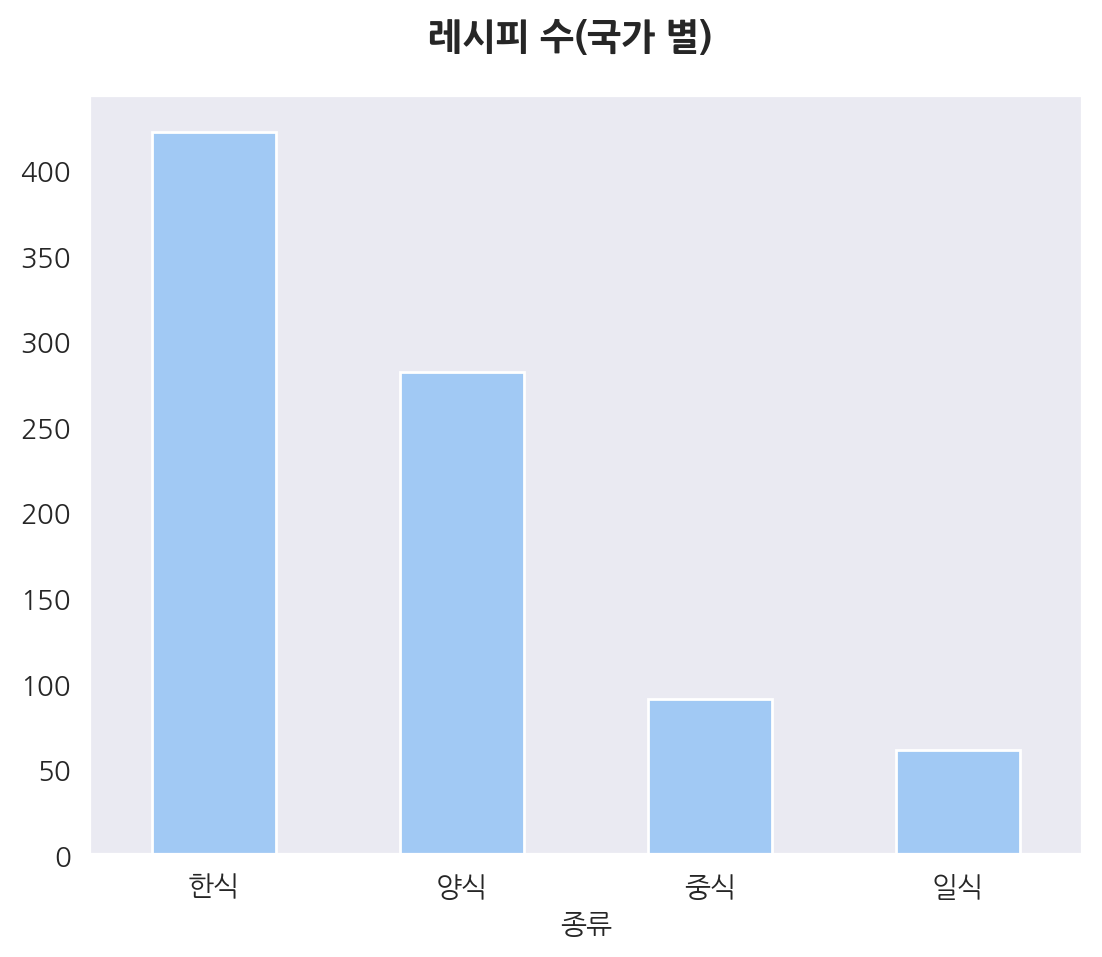

In [15]:
# 한식 중식 양식 일식만 보기
country = ['한식', '중식', '양식', '일식']
df.loc[df['종류'].isin(country)]['종류'].value_counts().plot.bar(rot=0);
plt.suptitle('레시피 수(국가 별)', fontsize=13, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show()

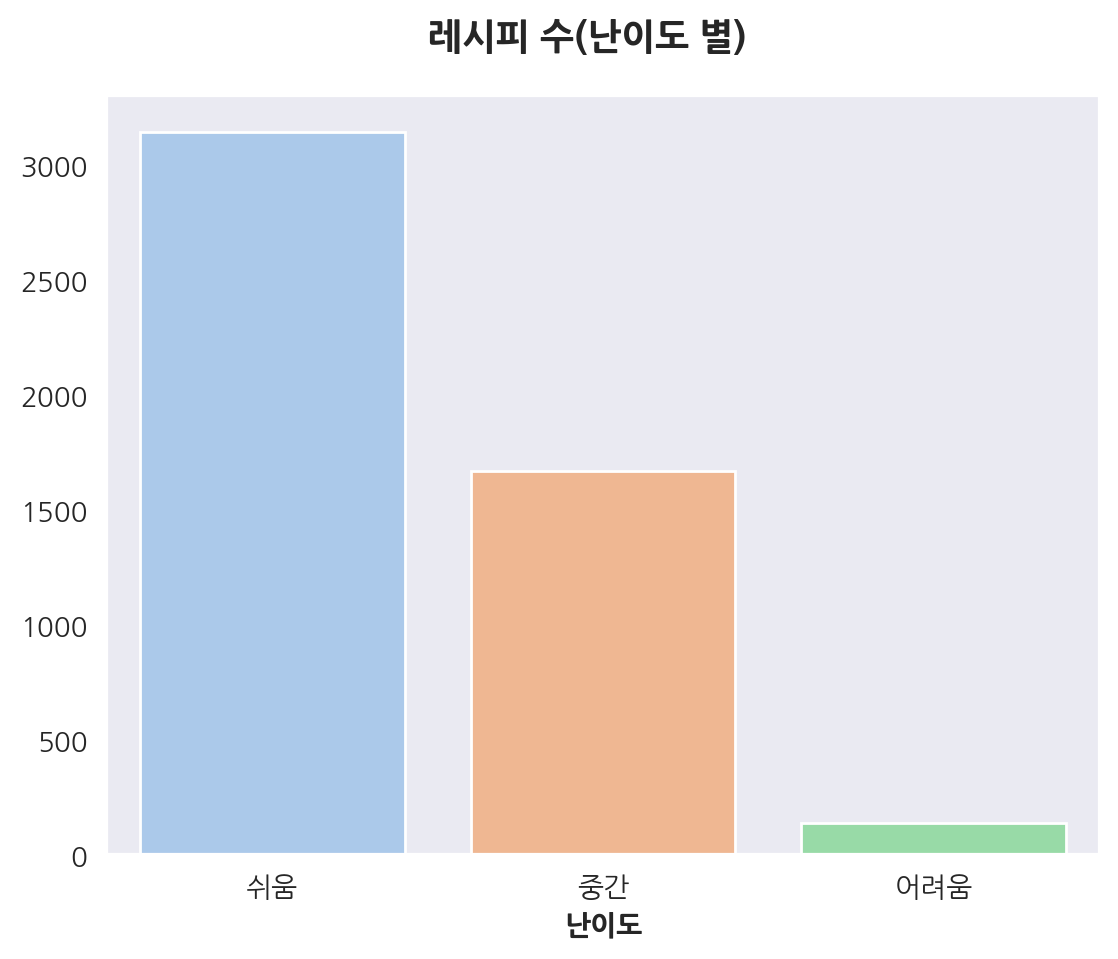

In [16]:
# 난이도별 레시피 분포 확인
# 난이도가 비교적 쉬운 레시피의 수가 많은 것을 알 수 있음
sns.countplot(data=df, x='난이도');
plt.suptitle('레시피 수(난이도 별)', fontsize=13, fontweight='bold')
plt.xlabel('난이도', fontweight='bold')
plt.ylabel('')
plt.xticks(ticks=[0, 1, 2], labels=['쉬움', '중간', '어려움'])
plt.subplots_adjust(top=0.9)
plt.show()

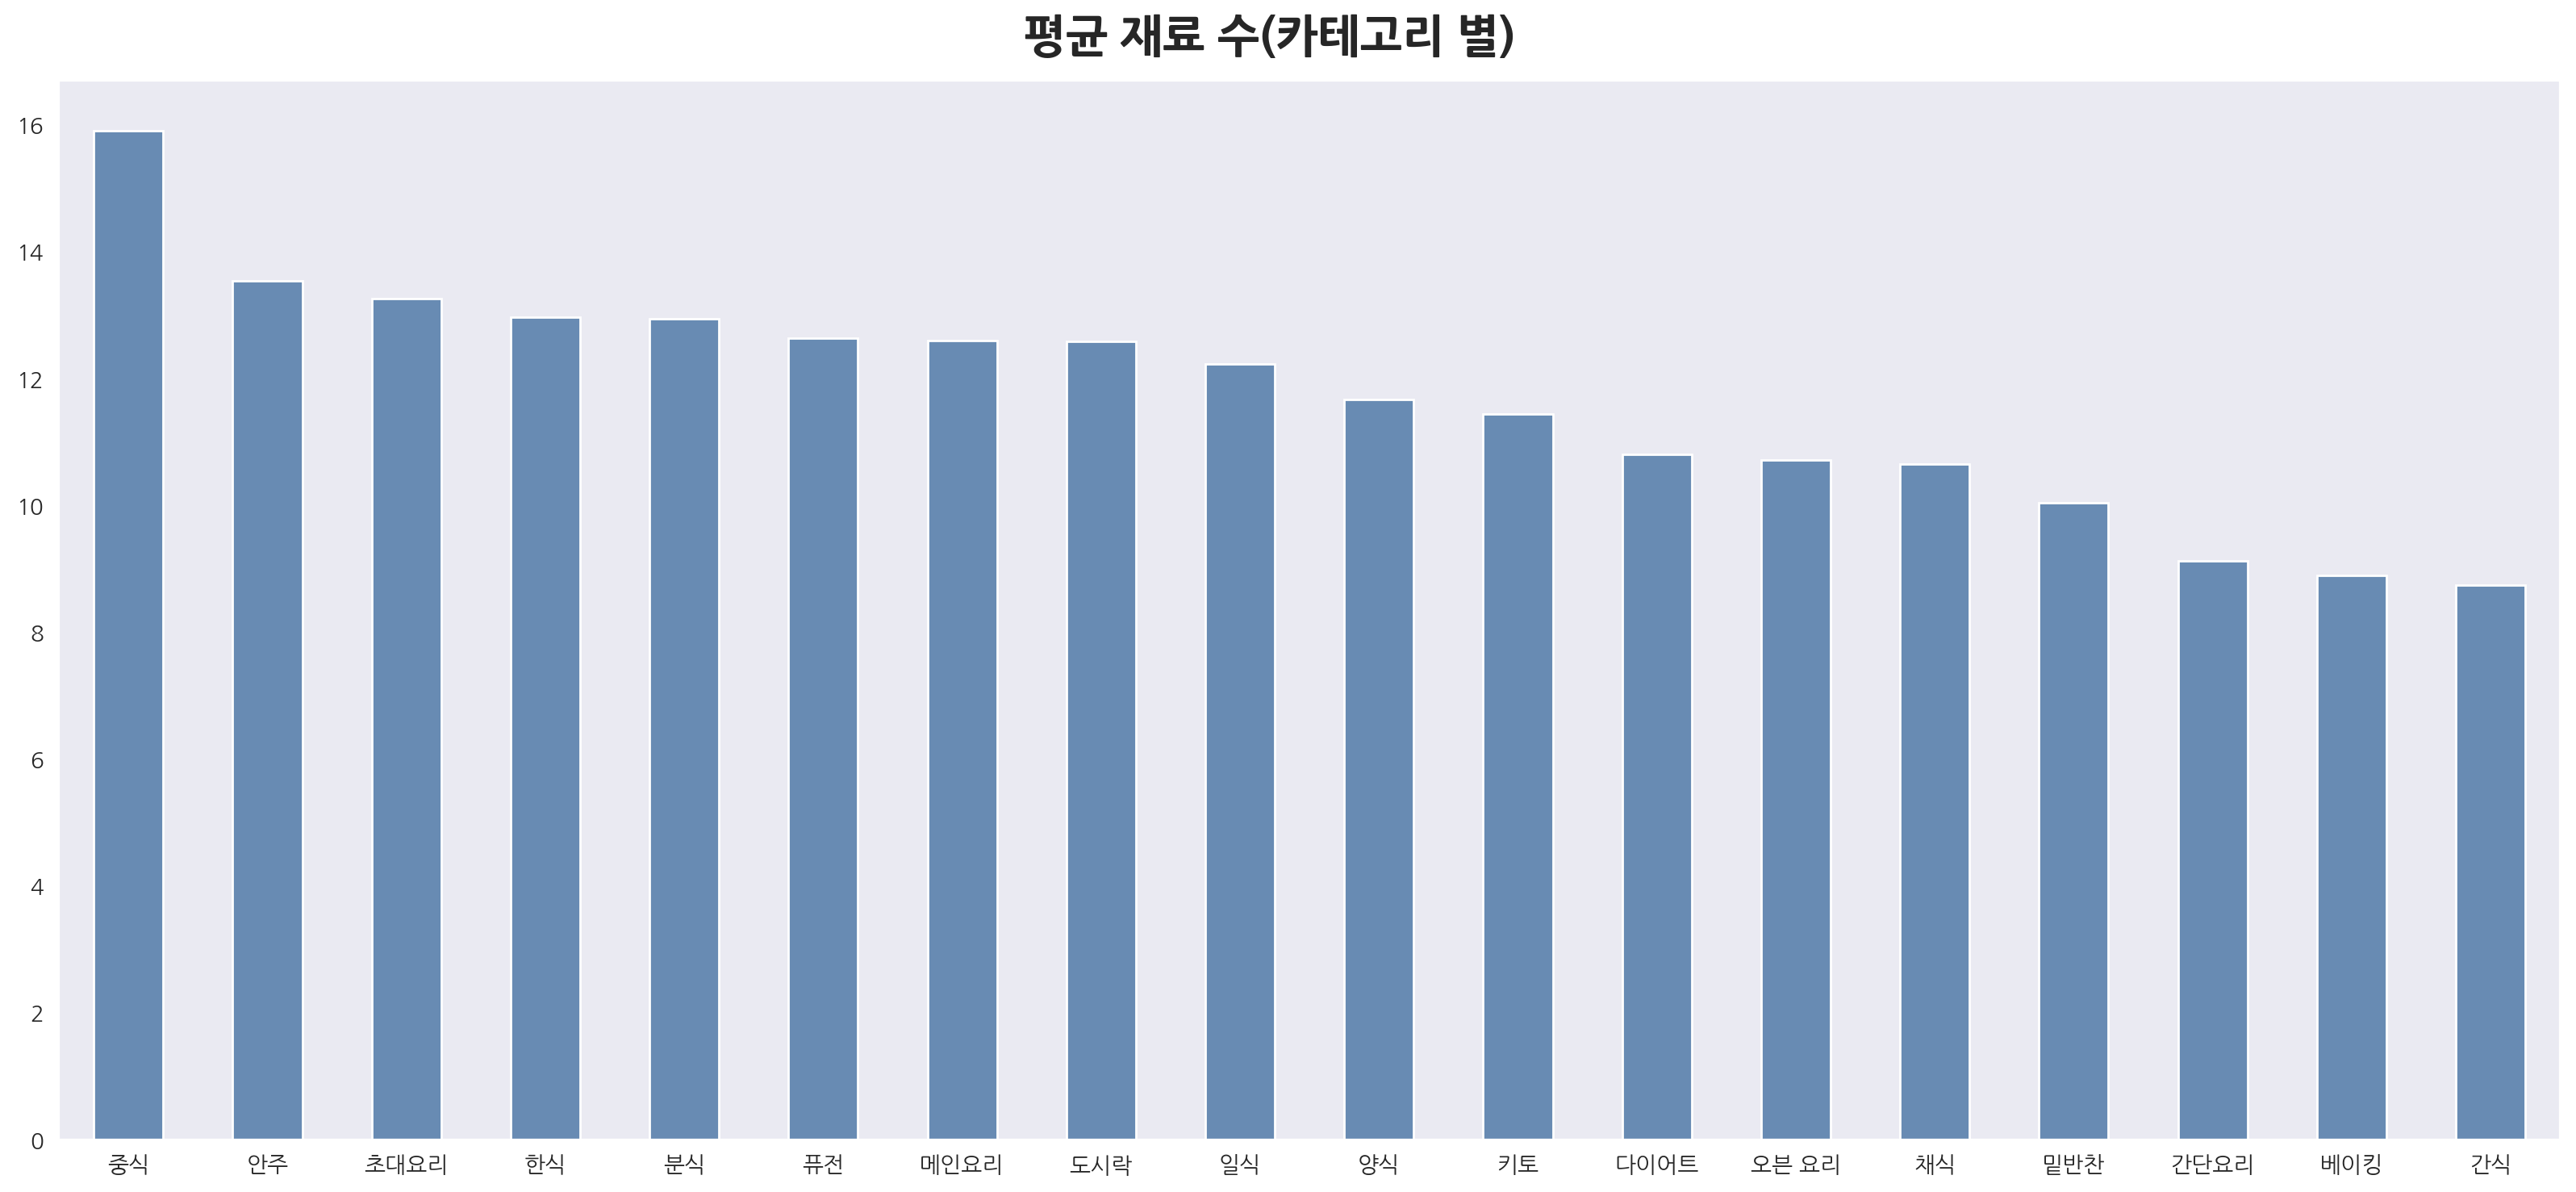

In [17]:
# 카테고리별 평균 재료수
plt.figure(figsize=(20,8))
df.groupby('종류')['재료수'].mean().sort_values(ascending=False).plot.bar(rot=0, color=blue_code[0]);
plt.suptitle('평균 재료 수(카테고리 별)', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.subplots_adjust(top=0.93)
plt.show()

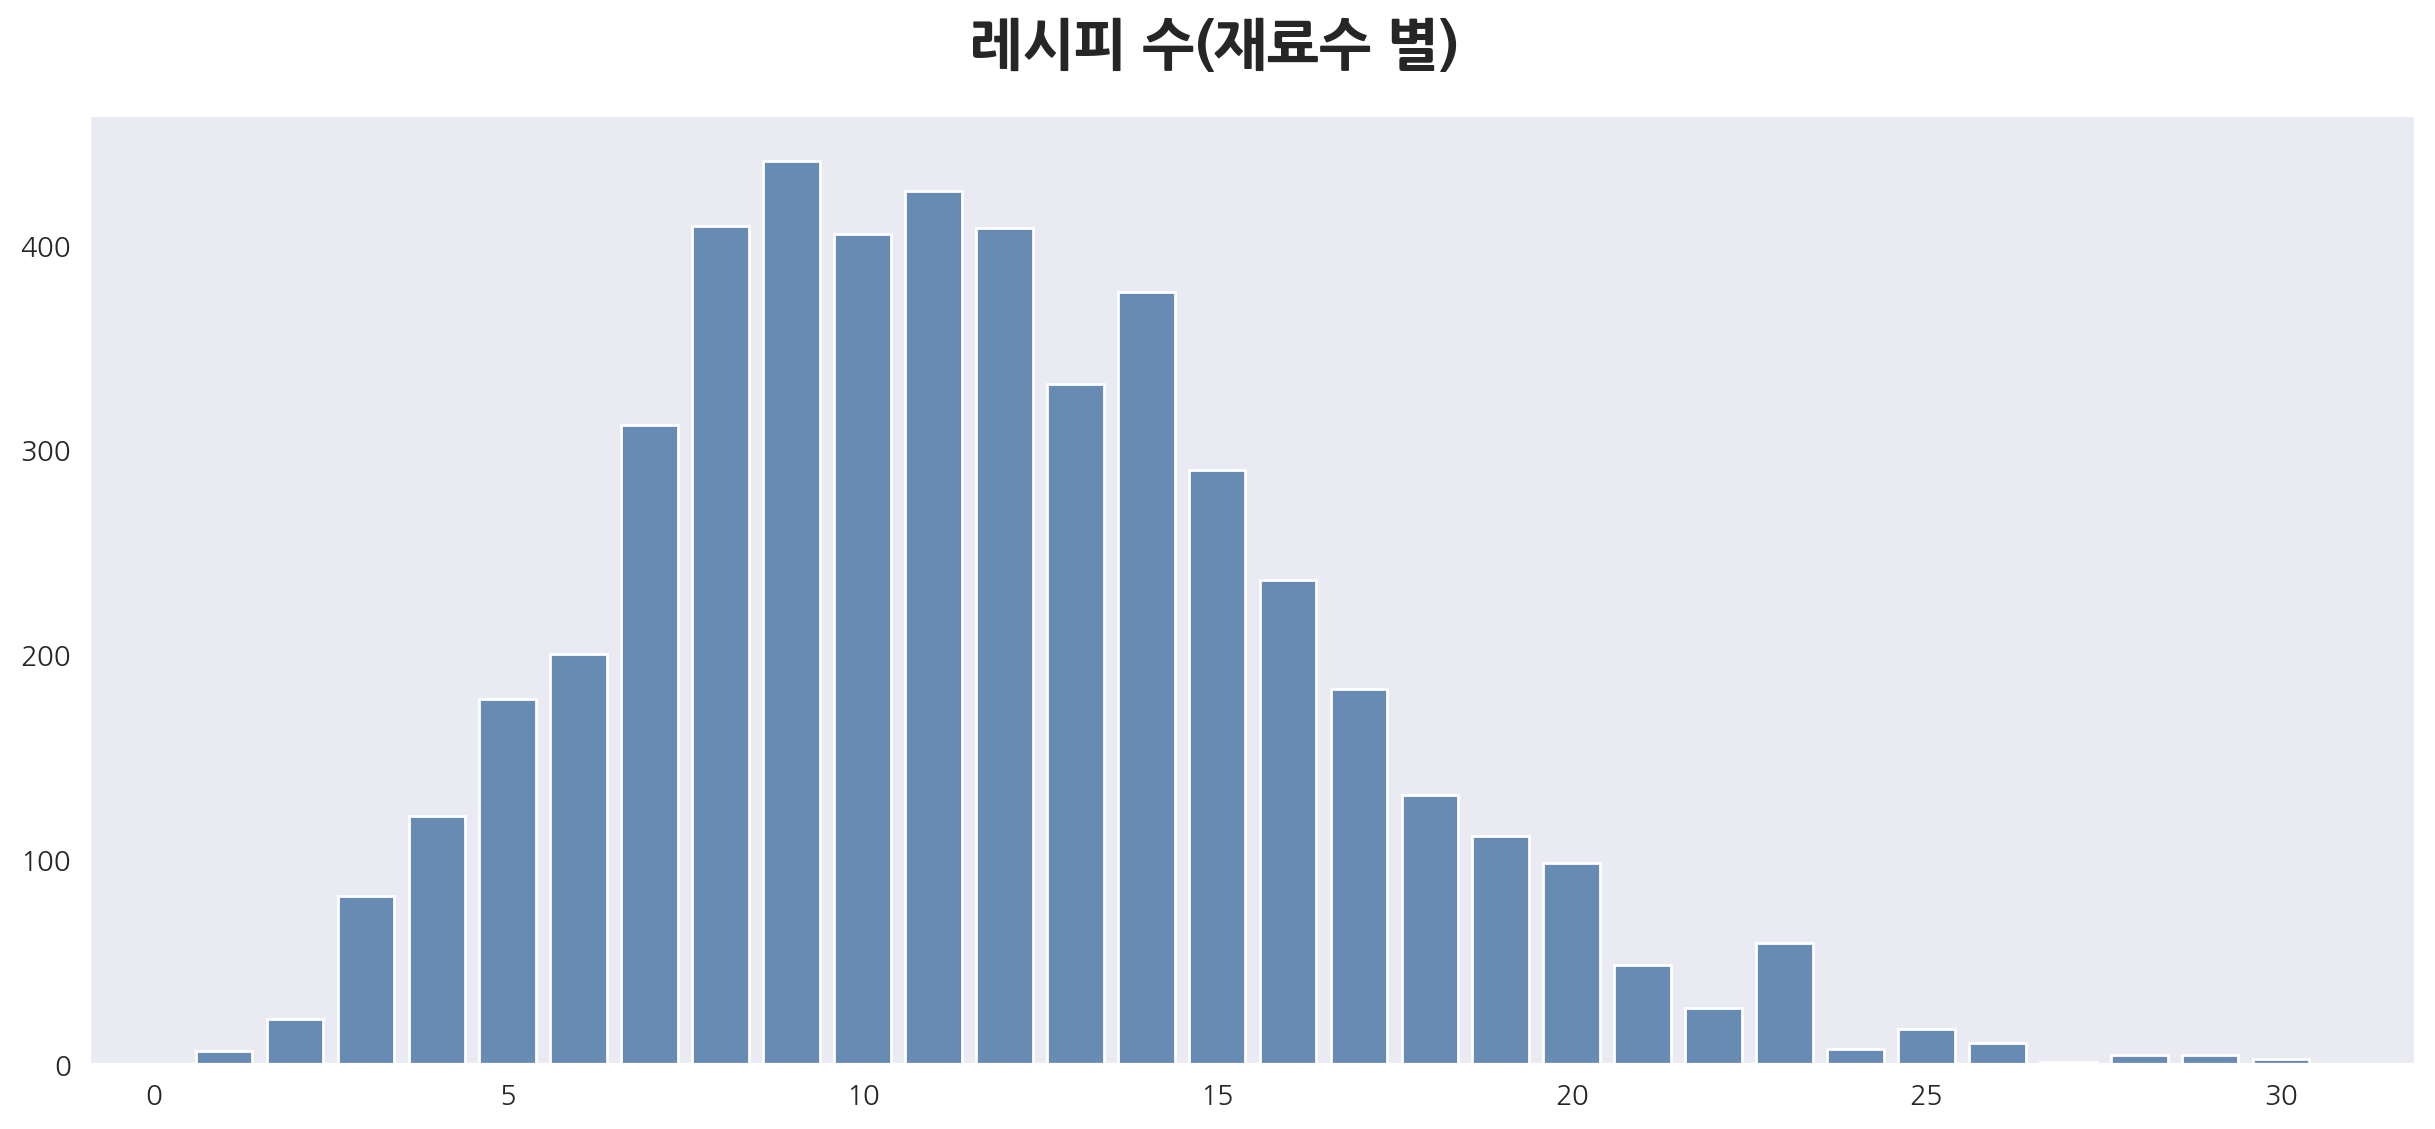

In [18]:
# 전체 레시피의 필요 재료수
ing_counts = df['재료수'].value_counts()
plt.figure(figsize=(15,6))
plt.bar(ing_counts.index, ing_counts.values, color=blue_code[0])
plt.suptitle('레시피 수(재료수 별)', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.show() 

In [19]:
df['난이도'] = df['난이도'].astype(str)

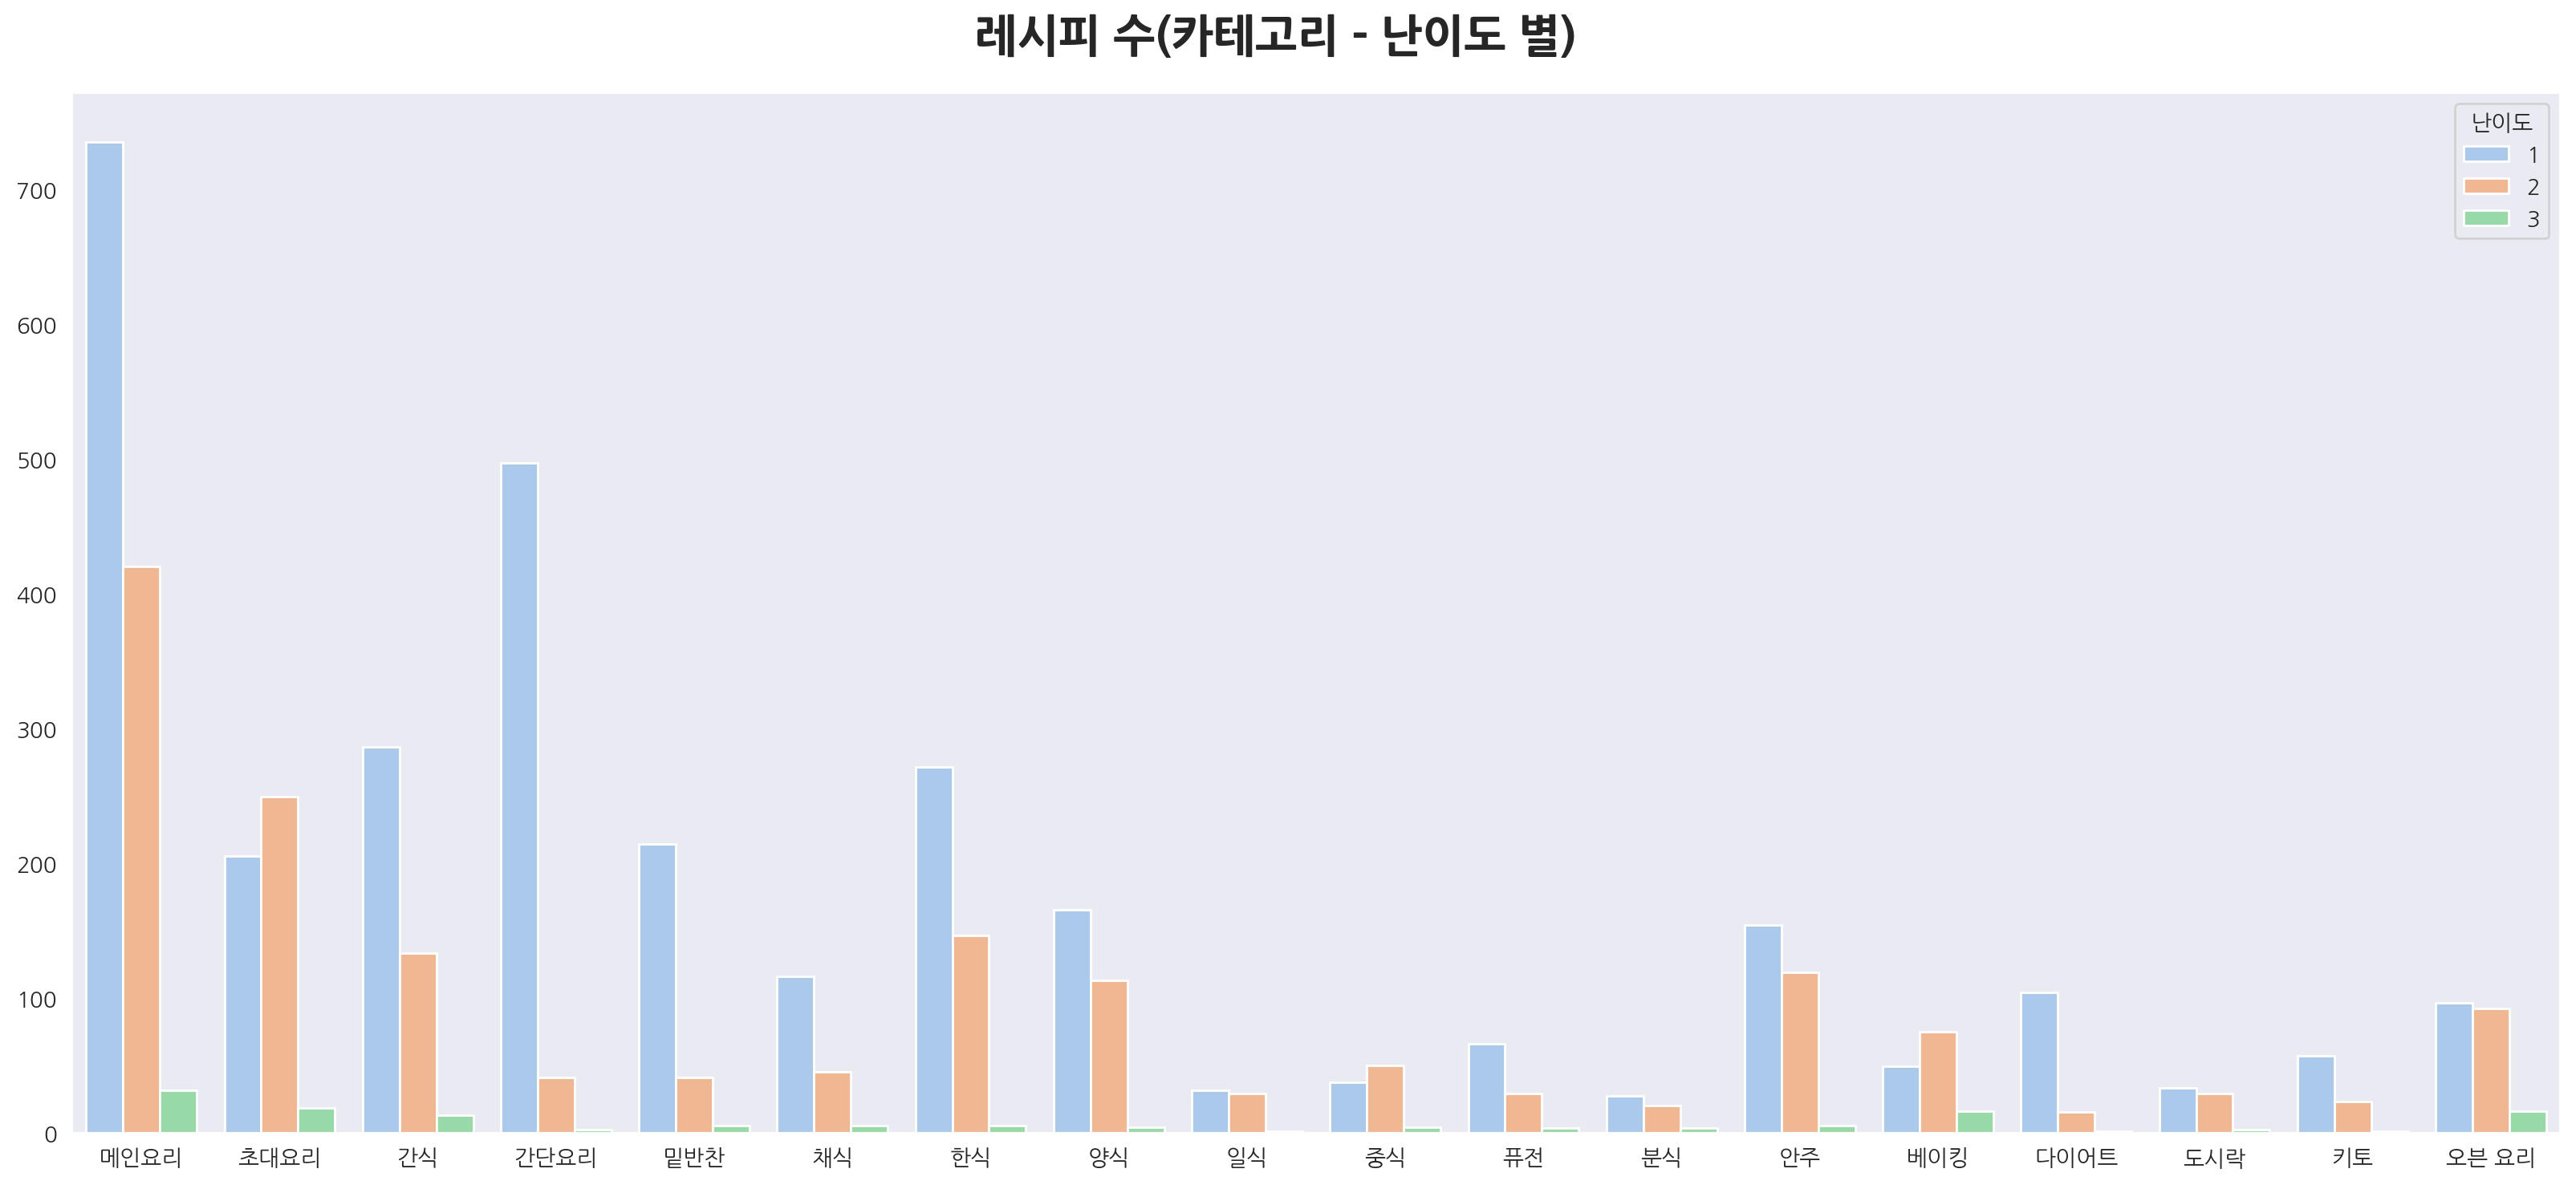

In [20]:
# 카테고리 별 난이도의 분포 확인
plt.figure(figsize=(20,8))
sns.countplot(data=df, x='종류', hue='난이도');
plt.suptitle('레시피 수(카테고리 - 난이도 별)', fontsize=20, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.subplots_adjust(top=0.92)
plt.show()